In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import tifffile
import matplotlib.pyplot as plt
import pyvista as pv
import cv2 as cv
import numpy as np
import itertools
import scipy
from scipy import ndimage as ndi
import time
from sklearn.mixture import GaussianMixture as GMM
from scipy.ndimage import generic_filter
from skimage.feature import peak_local_max

C:\Users\Fabagh001\Anaconda3\envs\FARAMARZ\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
files = ['B51_bag02.tif' , 'B51_bag40.tif' , 'B51_bag80.tif' , 'B51_bag120.tif']
input_path = ''
file_number = 0
img = tifffile.imread(input_path+files [file_number])
print (img.shape)


(8322, 1008, 1008)


In [122]:
def segment_3d_random_walker(vol):

    vol_standard = sk.exposure.rescale_intensity(vol,out_range=(-1, 1))

    # The range of the binary image spans over (-1, 1).
    # We choose the hottest and the coldest pixels as markers.
    markers = np.zeros(vol.shape, dtype=np.uint)
    markers[vol_standard < -0.8] = 1
    markers[vol_standard > 0] = 2

    # Run random walker algorithm
    labels = sk.segmentation.random_walker(vol_standard, markers, beta=4000, mode='bf')
    
    return labels

In [123]:
gap = 800
labels = segment_3d_random_walker (img[gap:gap +3])

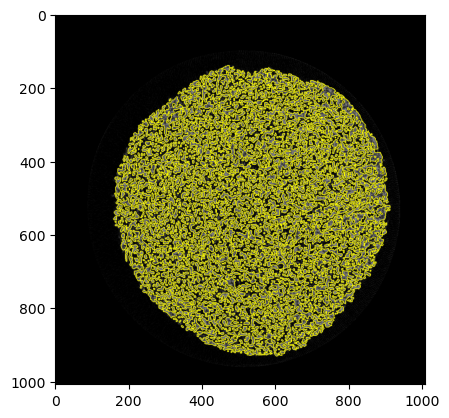

In [125]:
num = 0
plt.imshow(mark_boundaries(img[num+ gap], labels[num],mode='outer'))
#plt.imsave('check_1.png',mark_boundaries(img[num+ gap], labels[num],mode='outer'))